In [69]:
import matplotlib.pyplot as plt

In [391]:
import pandas as pd
data=pd.read_csv('loans_full_schema.csv')

In [392]:
data.shape

(10000, 55)

# 1. Describe the dataset and any issues with it.

The dataset contains 10,000 loan records, and for each record, there are 55 features describe the loan. Out of the 55 features, there are 42 numerical features and 13 categorical features. The features consist of 3 categories. The first category is Character, including the credit history that related to lines of credit, legal situation and borrowing history like late payments, background. The second category is Capacity, including debt-to-income ratio. The third category is Condition, for example, the amount of loan, the interest rate and the term. The fourth category is Capital, like the job and home ownership.

### 1. Null values:

However, there are several columns contains null values as shown in the next cell. In particular, annual_income_joint, verification_income_joint, debt_to_income_joint, months_since_last_delinq and months_since_90d_late features contains more than half records are null values. 

In [154]:
data.isna().sum(0)[data.isna().sum(0)>0].sort_values(ascending=False)

verification_income_joint           8545
debt_to_income_joint                8505
annual_income_joint                 8505
months_since_90d_late               7715
months_since_last_delinq            5658
months_since_last_credit_inquiry    1271
emp_title                            833
emp_length                           817
num_accounts_120d_past_due           318
debt_to_income                        24
dtype: int64

From above table, I noticed the count of null values for the verification_income_joint and annual_income_joint are not equal, which may be an error. Therefore, I select the records that have annual_income_joint but do not have a verfication_income_joint. There are 40 records that with annual_income_joint without an income verification recorded. This could be due to mistakes possible arise from data collection or data entry etc.

In [153]:
df=data[(data['annual_income_joint'].notna())&(data['verification_income_joint'].isna())][['annual_income_joint','verification_income_joint']]
df.head()

,annual_income_joint,verification_income_joint
349,152000.0,NaN
559,157000.0,NaN
1295,140000.0,NaN
1351,150000.0,NaN
1442,100000.0,NaN


Therefore I first split dataset into individual and joint loan separately.

In [393]:
data[data.application_type=='joint']['annual_income']=data[data.application_type=='individual']['annual_income_joint']
data[data.application_type=='joint']['verification_income']=data[data.application_type=='individual']['verification_income_joint']
data[data.application_type=='joint']['debt_to_income']=data[data.application_type=='individual']['debt_to_income_joint']
data.drop(columns=['verification_income_joint','debt_to_income_joint','annual_income_joint'],inplace=True)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [367]:
data.application_type.value_counts()

individual    8505
joint         1495
Name: application_type, dtype: int64

for months_since_90d_late, and months_since_last_delinq, I change these two features to binary categorical features due to its large number of null values. 

The distribution of grades:

In [439]:
data.grade.value_counts().sort_index()

A    2459
B    3037
C    2653
D    1446
E     335
F      58
G      12
Name: grade, dtype: int64

# 2. Generate a minimum of 5 unique visualizations using the data and write a brief description of your observations.

In [440]:
data_num=data.select_dtypes(include=numerics)

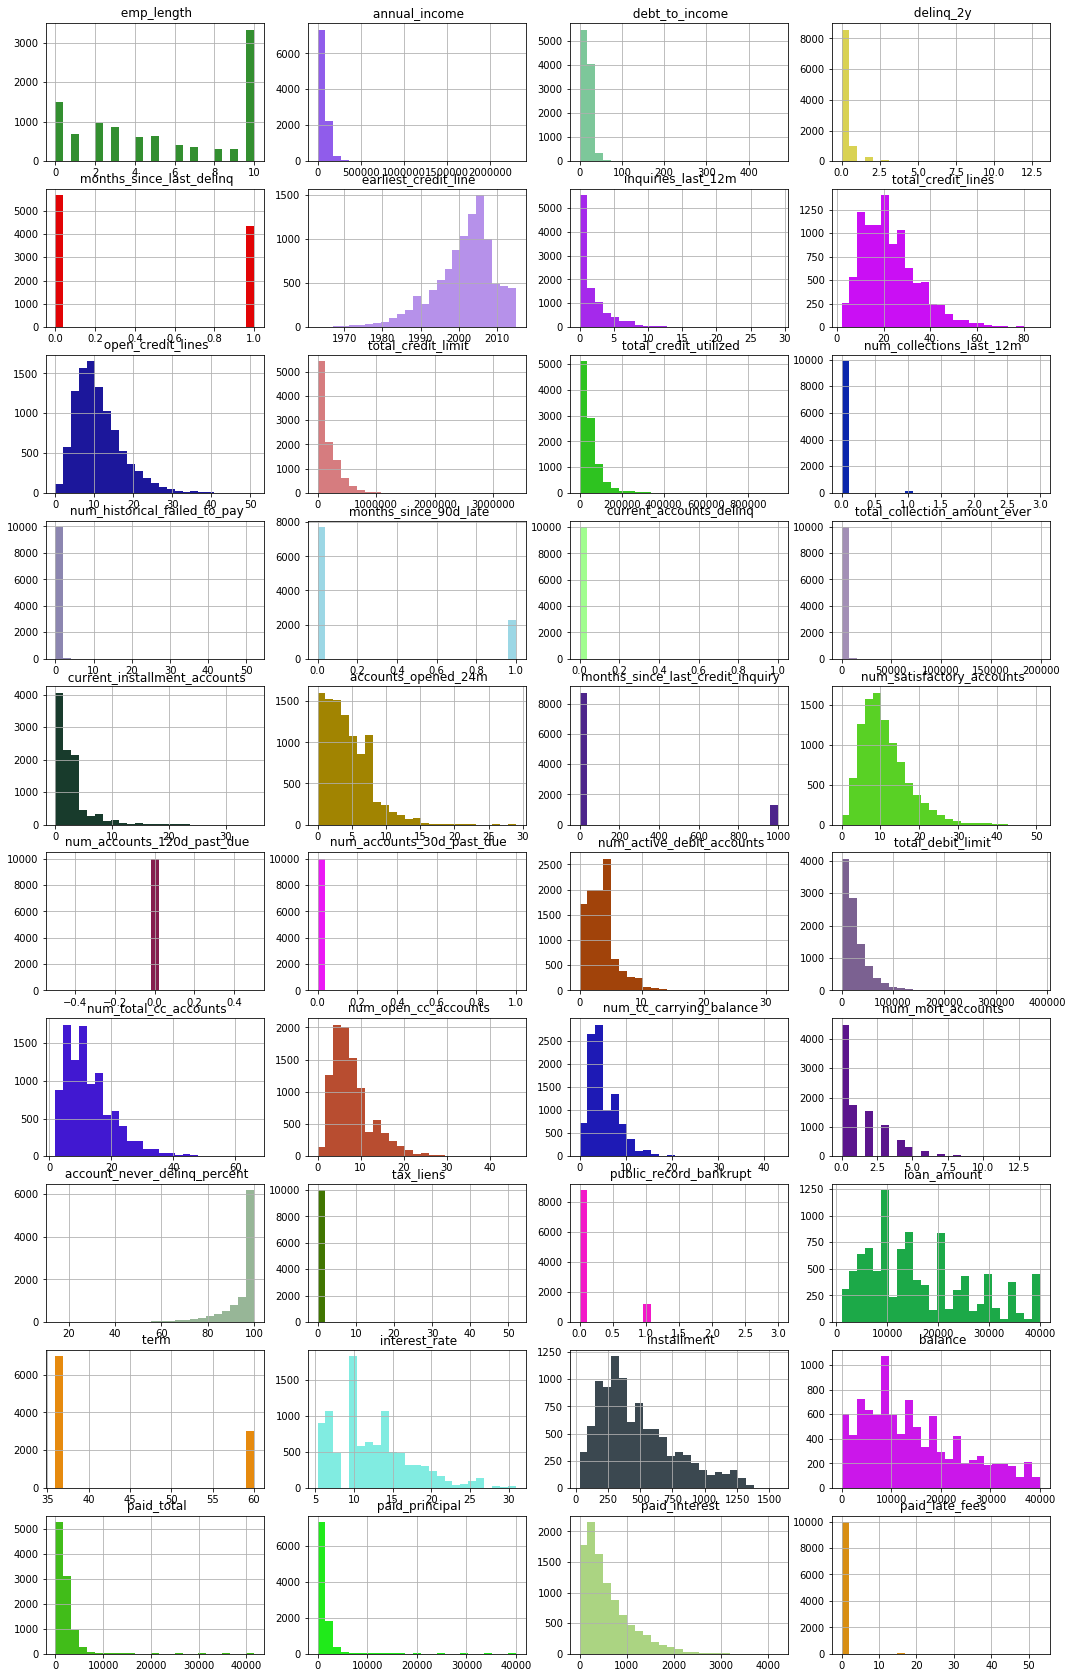

In [448]:
import random

plot1=data_num.columns.values[0:40].reshape((10,4))
fig, ax = plt.subplots(10,4,figsize=(18,30))
for i in range(10):
    for j in range(4):
        r = random.random()
        b = random.random()
        g = random.random()
        color=(r, g, b)
        data[plot1[i,j]].hist(bins=25, color=color, ax=ax[i,j])
        ax[i,j].set(title=' {}'.format(plot1[i,j]))
plt.show()

I encode the grade A to F to be 1 to 7 in order to draw the boxplot for different features. What I find is that for home ownership, rent will have a lower grade than mortgage or own. For application type, joint application also tends to have a lower grade. And for loan purpose, we see that leisure purposes such as vacation has the lowest overall grade, while primary demands such as house, medical will have a higher grades.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

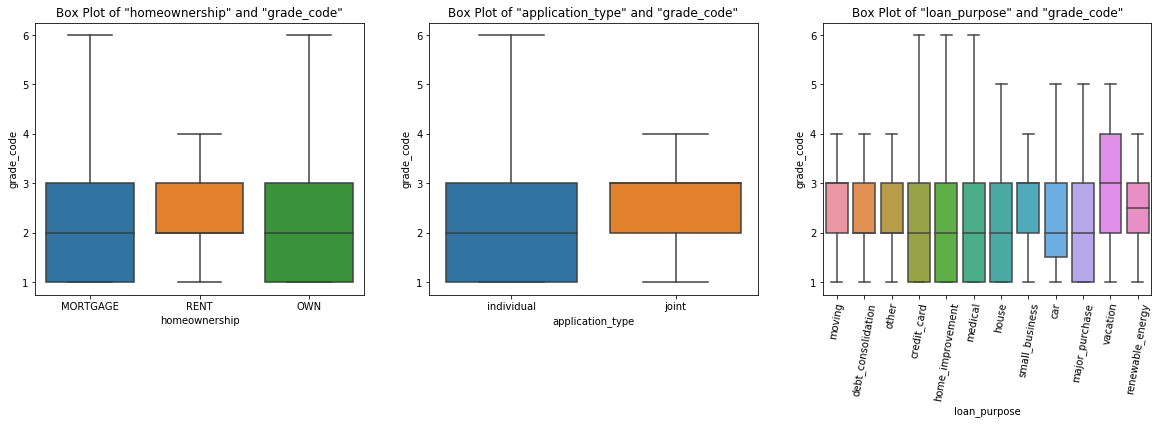

In [375]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
import seaborn as sns
data['grade_code'] = pd.factorize(data['grade'],sort=True)[0] + 1
sns.boxplot(x='homeownership',y='grade_code',data = data, showfliers=False,ax=ax[0])
sns.boxplot(x='application_type',y='grade_code',data = data, showfliers=False,ax=ax[1])
sns.boxplot(x='loan_purpose',y='grade_code',data = data, showfliers=False,ax=ax[2])

ax[0].set_title('Box Plot of "homeownership" and "grade_code"')
ax[1].set_title('Box Plot of "application_type" and "grade_code"')
ax[2].set_title('Box Plot of "loan_purpose" and "grade_code"')
plt.xticks(rotation=80)

Text(0.5, 1, 'Correlation Matrix')

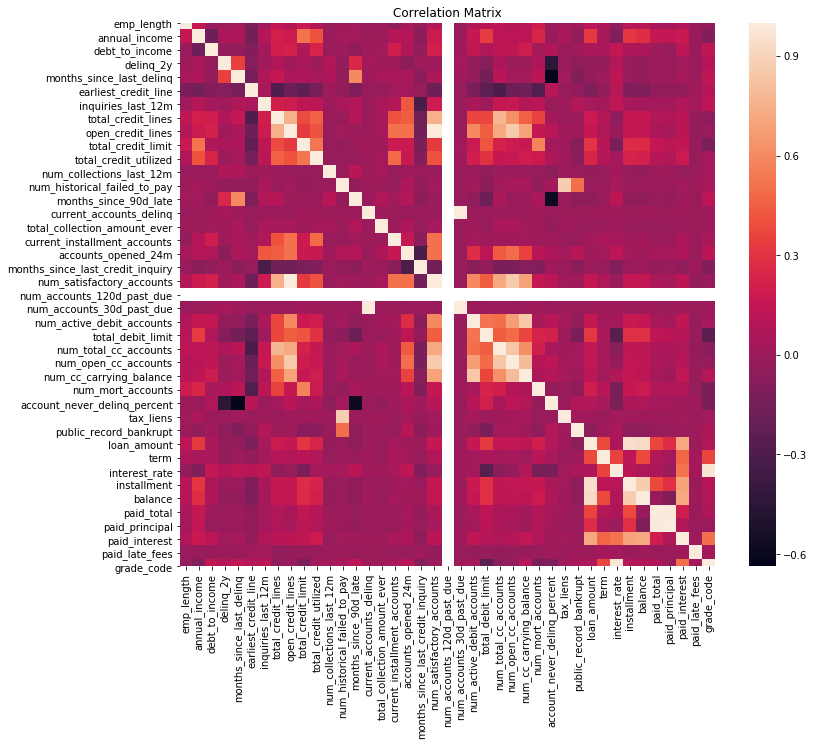

In [386]:
import seaborn as sns
corr_df = data_num
corr_mat= corr_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_mat)
plt.title('Correlation Matrix')

In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
for col in data_n.columns:
    print(col)
    data=remove_outlier(data,col)

# 3. Create a feature set and create a model which predicts interest rate using at least 2 algorithms. Describe any data cleansing that must be performed and analysis when examining the data.

- null values
- skewness
- correlation between features
- normalization/standardization of features
- categorical features -- one hot encoding

## 3.1 Data Preprocessing

### Transform feature with large number of null values to one-hot features. Fill other features with null values with 0.

In [449]:
data.months_since_90d_late=data.months_since_90d_late.notna()*1.0
data.months_since_last_delinq=data.months_since_last_delinq.notna()*1.0
data.months_since_last_credit_inquiry=data.months_since_last_credit_inquiry.fillna(1000)
data.emp_length.fillna(0,inplace=True)
data.num_accounts_120d_past_due.fillna(0,inplace=True)
data.debt_to_income.fillna(0.0,inplace=True)

In [450]:
data['grade_code'] = pd.factorize(data['grade'],sort=True)[0] + 1

### Split data into numerical and categorical

In [451]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data_num=data.select_dtypes(include=numerics)
data_cat=data.select_dtypes(include='object')

### Test correlation between features

In [452]:
for col in corr_mat.columns:
    corr_mat.drop(corr_mat[(corr_mat[col]>0.8)&(corr_mat[col]!=1)].iloc[1:].index,inplace=True)
    corr_mat.drop(corr_mat[(corr_mat[col]<-0.8)&(corr_mat[col]!=1)].iloc[1:].index,inplace=True)
data_num=data_num[corr_mat.index]

### Categorical feature selection

In [453]:
data_cat.apply(lambda col:len(col.unique()))

emp_title                 4742
state                       50
homeownership                3
verified_income              3
loan_purpose                12
application_type             2
grade                        7
sub_grade                   32
issue_month                  3
loan_status                  6
initial_listing_status       2
disbursement_method          2
dtype: int64

The emp_title has too many unique value, will make our data too sparse, should group them into bigger categories, e.g. by industry. But we choose to drop this column first to see the prediction result.

In [454]:
data_cat.drop(columns=['emp_title'],inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Use one hot encoding on categorical features

In [455]:
# one hot encoding
df_cat=pd.get_dummies(data_cat)

### Numerical feature selection

In [456]:
data_num.drop(columns=['paid_total',	'paid_principal',	'paid_interest',	'paid_late_fees'],inplace=True)

standardize numerical features

In [458]:
from sklearn import preprocessing
df = pd.DataFrame()
Y = data_num.interest_rate

for col in data_num.drop(columns='interest_rate').columns:
    df[col] = preprocessing.scale(data_num[col])

The interest rate distribution is skewed. Use logorithm to transform the interest rate into normal distribution

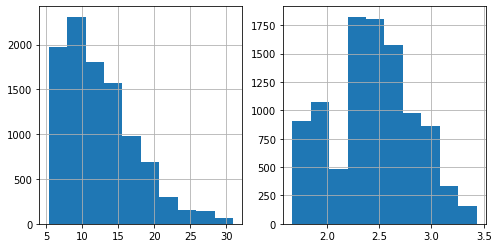

In [537]:
fig,ax=plt.subplots(1,2,figsize=(8,4))
data.interest_rate.hist(ax=ax[0])
data.interest_rate.apply(np.log).hist(ax=ax[1])


### concat categorical and numerical features together

In [459]:
df[df_cat.columns]=df_cat

## 3.2 Modeling

### Split data into train, validation and test in ratio 7:2:1

In [405]:
from sklearn.model_selection import train_test_split

In [462]:
X,X_test,y,y_test=train_test_split(df,np.log(Y),test_size=0.1)

In [463]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=2/9)

### Baseline model

In [408]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,make_scorer
mse=make_scorer(mean_squared_error)

### Linear regression with L1 regularization (natural feature selection)

In [512]:
lasso = Lasso().fit(X_train.drop(columns='grade_code'), y_train)
y_pre=lasso.predict(X_val.drop(columns='grade_code'))
mean_squared_error(y_pre,y_val)

0.15629545683206753

### Random forest - baseline

In [538]:
rf = RandomForestRegressor().fit(X_train.drop(columns='grade_code'),y_train)
y_pred=rf.predict(X_val.drop(columns='grade_code'))
mean_squared_error(y_pred,y_val)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.0950720724725618

### Feature importance
By visualizing feature importances, we first find grade is the most important features that exceed all other features greatly. Therefore I plot a boxplot to visualize the relationship between grade and interest rate. 

From the boxplot, for different grades, the corresponding interest rates are ordered ascendingly without overlapping. Thus it coule possibly be a form of data leakage if the grade is assigned after the interest rate. I remove this feature from the model. Then use feature importance to choose the best top 25 features from the rest.

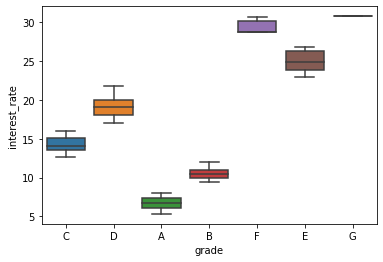

In [437]:
sns.boxplot(x='grade',y='interest_rate',data = data, showfliers=False)

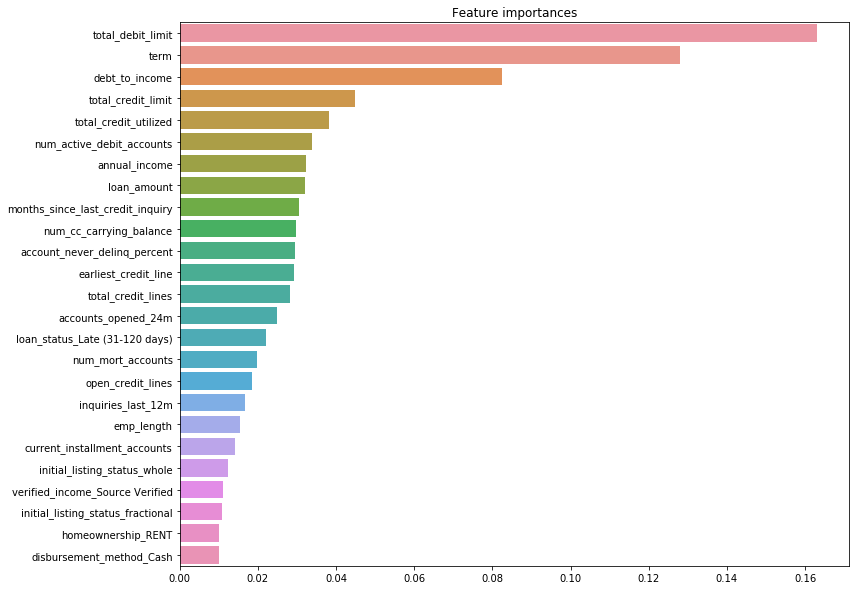

In [524]:
fi=rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
                 axis=0)
indices = np.argsort(fi)[::-1][:25]
plt.figure(figsize=[12,10])
plt.title("Feature importances")
#plt.bar(fi[indices],color="b", yerr=std[indices], align="center")
sns.barplot(x=fi[indices], y=X_train.columns[indices])

In [ ]:
data_cat.drop(columns=['grade','sub_grade'],inplace=True)

### Gridsearch best parameters for random forest

In [557]:
def gd_search(X,y):
    xgb_clf = RandomForestRegressor()
    param=dict(n_estimators=[40,50,60])
    
    gd_clf = GridSearchCV(estimator=xgb_clf,  param_grid=param, 
                                scoring=mse, verbose=10)
    gd_clf.fit(X,y)
    best_param=gd_clf.best_params_
    cv_results=pd.DataFrame(gd_clf.cv_results_)
    return gd_clf,best_param,cv_results

In [558]:
clf,param,cv_results=gd_search(X,y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] n_estimators=40 .................................................
[CV] ..................... n_estimators=40, score=0.009, total=   4.0s
[CV] n_estimators=40 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV] ..................... n_estimators=40, score=0.010, total=   3.6s
[CV] n_estimators=40 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.6s remaining:    0.0s


[CV] ..................... n_estimators=40, score=0.009, total=   3.5s
[CV] n_estimators=50 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.1s remaining:    0.0s


[CV] ..................... n_estimators=50, score=0.009, total=   4.4s
[CV] n_estimators=50 .................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   15.5s remaining:    0.0s


[CV] ..................... n_estimators=50, score=0.010, total=   5.4s
[CV] n_estimators=50 .................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   20.9s remaining:    0.0s


[CV] ..................... n_estimators=50, score=0.009, total=   6.2s
[CV] n_estimators=60 .................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   27.1s remaining:    0.0s


[CV] ..................... n_estimators=60, score=0.009, total=   5.4s
[CV] n_estimators=60 .................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   32.5s remaining:    0.0s


[CV] ..................... n_estimators=60, score=0.010, total=   8.3s
[CV] n_estimators=60 .................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   40.7s remaining:    0.0s


[CV] ..................... n_estimators=60, score=0.009, total=   5.6s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   46.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   46.3s finished


In [519]:
print(f"best parameter is {param}")

best parameter is {'n_estimators': 50}


In [529]:
rf = RandomForestRegressor(n_estimators=50).fit(X_train[X_train.columns[indices]],y_train)
y_pred=rf.predict(X_val[X_train.columns[indices]])
mean_squared_error(y_pred,y_val)

0.08898678356960124

In [565]:
def gd_search(X,y):
    xgb_clf = RandomForestRegressor()
    param=dict(n_estimators=[30,40,50])
    
    gd_clf = GridSearchCV(estimator=xgb_clf,  param_grid=param, 
                                scoring=mse, verbose=10)
    gd_clf.fit(X,y)
    best_param=gd_clf.best_params_
    cv_results=pd.DataFrame(gd_clf.cv_results_)
    return gd_clf,best_param,cv_results
clf,param,cv_results=gd_search(X,y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] n_estimators=30 .................................................
[CV] ..................... n_estimators=30, score=0.009, total=   3.2s
[CV] n_estimators=30 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV] ..................... n_estimators=30, score=0.010, total=   3.3s
[CV] n_estimators=30 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.5s remaining:    0.0s


[CV] ..................... n_estimators=30, score=0.009, total=   3.2s
[CV] n_estimators=40 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.8s remaining:    0.0s


[CV] ..................... n_estimators=40, score=0.009, total=   5.5s
[CV] n_estimators=40 .................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   15.3s remaining:    0.0s


[CV] ..................... n_estimators=40, score=0.010, total=   5.3s
[CV] n_estimators=40 .................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   20.6s remaining:    0.0s


[CV] ..................... n_estimators=40, score=0.009, total=   5.1s
[CV] n_estimators=50 .................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   25.7s remaining:    0.0s


[CV] ..................... n_estimators=50, score=0.009, total=   6.7s
[CV] n_estimators=50 .................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   32.5s remaining:    0.0s


[CV] ..................... n_estimators=50, score=0.010, total=   4.6s
[CV] n_estimators=50 .................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   37.0s remaining:    0.0s


[CV] ..................... n_estimators=50, score=0.009, total=   4.6s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   41.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   41.6s finished


In [566]:
print(f"best parameter is {param}")

best parameter is {'n_estimators': 40}


In [575]:
rf = RandomForestRegressor(n_estimators=40).fit(X_train[X_train.columns[indices]],y_train)
y_pred=rf.predict(X_val[X_train.columns[indices]])
print(f'The validation MSE is {mean_squared_error(y_pred,y_val)}')

The validation MSE is 0.08987597380217832


### Apply model to the test set

In [577]:
rf = RandomForestRegressor(n_estimators=50).fit(X[X_train.columns[indices]],y)
y_pred=rf.predict(X_test[X_train.columns[indices]])
print(f'The test MSE is {mean_squared_error(y_pred,y_test)}')

The test MSE is 0.07838495643199991


# 4. Visualize the test results and propose enhancements to the model, what would you do if you had more time.

### Visualize test result

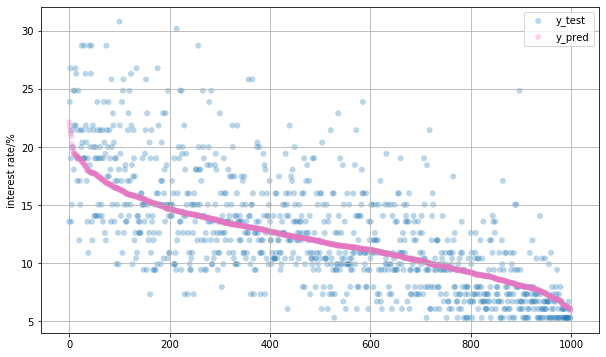

In [614]:
file_pred = pd.DataFrame({'y_test': np.exp(y_test), 'y_pred': np.exp(y_pred)}).sort_values(by='y_pred', ascending=False)
color=['tab:blue','tab:pink']
fig, ax = plt.subplots(figsize=(10,6))
for i,col in enumerate(['y_test',  'y_pred']):
  
    ax.scatter(range(file_pred.shape[0]), file_pred[col], c=color[i],label=col,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)
ax.set_ylabel('interest rate/%')
plt.show()

### Enhancement:

- deal with outliers of each feature
- redesign some features. For example, the job title can be grouped into larger category to be used. Since job is also a good factor to help determine their ability to pay loans. Also, many features can be further binned into different categories by ranges instead of absolute values.
- try more machine learning models and do more hyperparameter tunings to find the best result

### Assumption: 
- The interest rate is only affected by the features in the dataset, all other factors such as market trends, exchange rates or currency that could affect interest rate are held constant. 

- As we have removed strongly correlated features, we assume the rest features are independent of each other. But for tree-based method, we don't have to worry about the correlation between features.

